## Load JND file and plot

In [16]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### 1. Load JND file

In [96]:
chartType = 2
chartName = ['bar', 'bubble', 'pie'][chartType] 

propertyIndex = 0 # 0: distance, 1: intensity
liProperty = ['Distance', 'Intensity']

df_jnd = pd.read_csv('../jnd/jnd_{ct}.csv'.format(ct=chartName))

In [97]:
#set the filtering boundary
bound_bar = [0.1, 50]
bound_pie = [0.1, 60]
bound_bubble = [0.1, 25]
bound = [bound_bar, bound_bubble, bound_pie]

In [98]:
# Function: group JNDs according by property
#[input]
#1. chartIndex: 0, 1, 2 for bar, bubble, pie
#2. df: jnd Dataframe 
#3. propertyIndex: 0, 1 for distance, intensity
#4. filterB: filter JND by bounds set above
#5. boxMain: filter JND by boxplot setting, i.e., Q3 + 1.5 * IRQ

def getGroups(chartIndex, df, propertyIndex, filterB, boxMain):
    
    lowouter = bound[chartIndex][0]
    upouter = bound[chartIndex][1]
    group = ['distance', 'intensity'][propertyIndex]
    column = 'jnd'
    grouped = df.groupby(group)

    names, vals, xs, liUpBound = [], [] ,[], []

    new_df = pd.DataFrame()
    main_df = pd.DataFrame()
    count = 0
        
    for i, (name, subdf) in enumerate(grouped):
        names.append(name)
        col = subdf[column].tolist()
        if(filterB):
            if(boxMain==True):
                upouter = np.quantile(col, 0.75) + 1.5*(np.quantile(col, 0.75) - np.quantile(col, 0.25))
            outlier = [x for x in col if x <= lowouter or x >= upouter]
            col_filter = [x for x in col if x > lowouter and x < upouter]
            subdf_filter = subdf[(subdf[column] < upouter) & (subdf[column] > lowouter)]
        else:
            outlier = []
            col_filter = col
            subdf_filter = subdf
            
#         print('#outlier={0}, #normal={1}'.format(len(outlier), len(col_filter)), outlier)
        
        count += len(outlier)
        new_df = pd.concat([new_df, subdf_filter])
        vals.append(col_filter)
        xs.append(np.random.normal(i+1, 0.01, len(col_filter)))
        
    print('#outlier in total = {0}'.format(count), outlier)
    return names, vals, xs, new_df, count


In [99]:
names1, vals1, x1, new_df1, count1 = getGroups(chartType, df_jnd, 0, True, True)
names2, vals2, x2, new_df2, count2 = getGroups(chartType, df_jnd, 1, True, True)

#outlier in total = 36 [13.52078214, 13.80691442, 14.98714644, 15.59245437, 16.20683837]
#outlier in total = 40 [28.08653423, 47.44453796, 52.59223104, 64.10813237, 87.87544669, 121.4691621]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


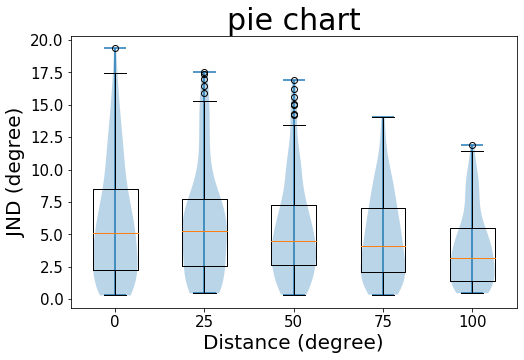

In [100]:
names, vals, xs = [], [] ,[]
df_now = pd.DataFrame()
df_main_now = pd.DataFrame()

# liProperty = ['distance', 'intensity']
# propertyIndex = 0 # 0: distance, 1: intensity

count = -1

if(propertyIndex == 0):
    names, vals, xs, df_now, count = names1, vals1, x1, new_df1, count1
else:
    names, vals, xs, df_now, count = names2, vals2, x2, new_df2, count2

plt.figure(figsize=(8, 5))

plt.boxplot(vals, labels=names)
plt.violinplot(vals)

ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)

indexC = 0
unit = 'degree' if (chartName=='pie') else 'pixel'
for x, val, clevel in zip(xs, vals, clevels):
#     plt.scatter(x, val,  c='black', s=30, alpha=0.3)
    plt.title('{cn} chart'.format(cn=chartName), fontSize=30)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.xlabel('{pro} ({unit})'.format(pro=liProperty[propertyIndex], unit=unit), fontsize=20)
#     plt.xlabel('Angular Distance (degree)', fontsize=20)
    plt.ylabel('JND ({unit})'.format(unit=unit), fontsize=20)
    indexC += 1

In [95]:
new_df1.to_csv('./jnd_{ct}_filter.csv'.format(ct=chartName), index=None)

In [55]:
chartName=='pie'?1:0

SyntaxError: invalid syntax (<ipython-input-55-dbc59bbce3e7>, line 1)